In [1]:
import pandas as pd
import time
# Đường dẫn tới file Excel
file_path = "\\Nhóm 8 - Thứ 7\\Source Code và Excel\\NaiveBayes\\Lung_Cancer_Dataset_Refined.xlsx"

# Đọc dữ liệu từ các sheet trong file Excel
df_train = pd.read_excel(file_path, sheet_name="Training Data")
df_scoring = pd.read_excel(file_path, sheet_name="Scoring Data")
start_manual = time.time()
# Phân chia tập dữ liệu theo giá trị của cột 'Lung Cancer'
def chia_theo_nhan(df, nhan):
    return df[df['Lung Cancer'] == nhan]

# Tính xác suất P(c) với sửa lỗi Laplace
def tinh_xac_suat_nhan(df, nhan):
    n_classes = len(df['Lung Cancer'].unique())  # Số lượng nhãn phân lớp
    class_count = len(chia_theo_nhan(df, nhan))
    return (class_count + 1) / (len(df) + n_classes)

# Tính xác suất P(x|c) với sửa lỗi Laplace cho từng thuộc tính
def tinh_xac_suat(df, cot, gia_tri):
    unique_values = df[cot].nunique()  # Số lượng giá trị khác nhau của thuộc tính
    count_value = len(df[df[cot] == gia_tri])
    return (count_value + 1) / (len(df) + unique_values)

# Dự đoán nhãn cho từng mẫu trong tập dữ liệu scoring
def du_doan_mau(mau, df_train):
    cac_nhan = df_train['Lung Cancer'].unique()  # Các nhãn có thể có (negative, stage-1, stage-2, stage-3)
    xac_suat_hau_nghiem = {}

    # Tính xác suất cho từng nhãn
    for nhan in cac_nhan:
        xac_suat_nhan = tinh_xac_suat_nhan(df_train, nhan)  # P(c) có sửa lỗi Laplace
        xac_suat_cac_thuoc_tinh = 1  # Khởi tạo tích xác suất P(x|c)

        # Tính tích xác suất cho tất cả thuộc tính của mẫu
        for cot in df_train.columns[:-1]:  # Loại bỏ cột 'Lung Cancer'
            xac_suat = tinh_xac_suat(chia_theo_nhan(df_train, nhan), cot, mau[cot])
            xac_suat_cac_thuoc_tinh *= xac_suat
            
        # P(c|x) = P(c) * P(x|c)
        xac_suat_hau_nghiem[nhan] = xac_suat_nhan * xac_suat_cac_thuoc_tinh

    # Trả về nhãn có xác suất lớn nhất
    return max(xac_suat_hau_nghiem, key=xac_suat_hau_nghiem.get)

# Thực hiện dự đoán cho tất cả các mẫu trong tập scoring
du_doan_ket_qua = []
for i, mau in df_scoring.iterrows():
    ket_qua = du_doan_mau(mau, df_train)
    du_doan_ket_qua.append(ket_qua)

# Gán kết quả dự đoán vào cột 'Lung Cancer'
df_scoring['Lung Cancer'] = du_doan_ket_qua

# Tính độ chính xác của mô hình
so_mau_dung = (df_scoring['Lung Cancer'] == df_scoring['Lung Cancer (Thực Tế)']).sum()
tong_so_mau = len(df_scoring)
do_chinh_xac = so_mau_dung / tong_so_mau

# Hiển thị độ chính xác
print(f"Độ chính xác của mô hình: {do_chinh_xac * 100:.2f}%")
end_manual = time.time()
manual_duration = end_manual - start_manual


Độ chính xác của mô hình: 91.33%


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Đường dẫn tới file Excel
file_path = "\\Nhóm 8 - Thứ 7\\Source Code và Excel\\NaiveBayes\\Lung_Cancer_Dataset_Refined.xlsx"

# Đọc dữ liệu từ các sheet trong file Excel
df_train = pd.read_excel(file_path, sheet_name="Training Data")
df_scoring2 = pd.read_excel(file_path, sheet_name="Scoring Data")

# Tính thời gian chạy và độ chính xác của phương pháp sử dụng thư viện
start_library = time.time()
# ====== Phương pháp sử dụng thư viện ======
# Chuẩn bị dữ liệu cho mô hình Naive Bayes của scikit-learn
X_train = df_train.drop(columns=['Lung Cancer'])
y_train = df_train['Lung Cancer']
X_scoring = df_scoring2.drop(columns=['Lung Cancer', 'Lung Cancer (Thực Tế)'])
# Mã hóa các cột dạng chuỗi thành dạng số
label_encoders = {}
X_train_encoded = X_train.copy()
X_scoring_encoded = X_scoring.copy()

for column in X_train_encoded.columns:
    if X_train_encoded[column].dtype == 'object':  # Nếu cột là dạng chuỗi
        le = LabelEncoder()
        X_train_encoded[column] = le.fit_transform(X_train_encoded[column])
        X_scoring_encoded[column] = le.transform(X_scoring_encoded[column])
        label_encoders[column] = le

# Sử dụng GaussianNB để huấn luyện mô hình
model = GaussianNB()
model.fit(X_train_encoded, y_train)

# Dự đoán kết quả
du_doan_ket_qua_thu_vien = model.predict(X_scoring_encoded)

# Thêm kết quả dự đoán vào DataFrame
df_scoring2['Lung Cancer'] = du_doan_ket_qua_thu_vien

# Tính độ chính xác của mô hình
so_mau_dung2 = (df_scoring2['Lung Cancer'] == df_scoring2['Lung Cancer (Thực Tế)']).sum()
tong_so_mau2 = len(df_scoring2)
do_chinh_xac2 = so_mau_dung2 / tong_so_mau2

# Hiển thị độ chính xác
print(f"Độ chính xác của mô hình: {do_chinh_xac2 * 100:.2f}%")
end_library = time.time()
library_duration = end_library - start_library

Độ chính xác của mô hình: 86.33%


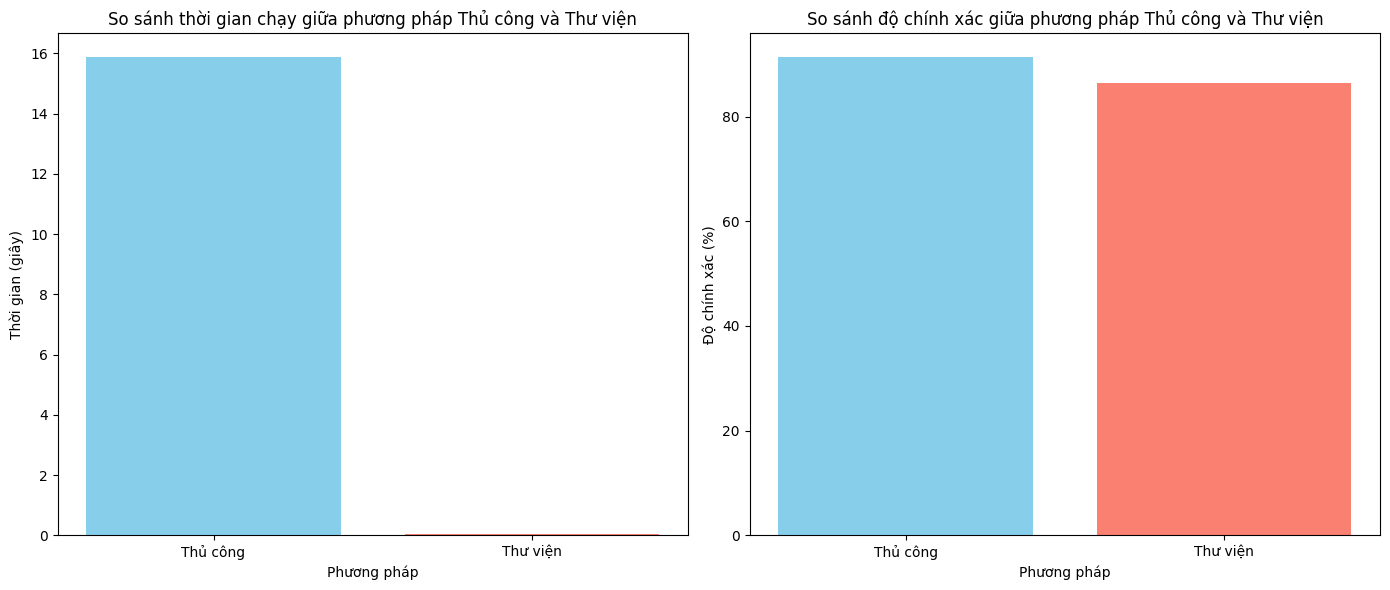

Thời gian chạy của phương pháp Thủ công: 15.8721 giây
Độ chính xác của phương pháp Thủ công: 91.33%
Thời gian chạy của phương pháp Thư viện: 0.0264 giây
Độ chính xác của phương pháp Thư viện: 86.33%


In [3]:

import matplotlib.pyplot as plt

# Tính độ chính xác của phương pháp thủ công
so_mau_dung_thu_cong = (df_scoring['Lung Cancer'] == df_scoring['Lung Cancer (Thực Tế)']).sum()
tong_so_mau = len(df_scoring)
do_chinh_xac_thu_cong = so_mau_dung_thu_cong / tong_so_mau

# Tính độ chính xác của phương pháp thư viện
so_mau_dung_thu_vien = (df_scoring2['Lung Cancer'] == df_scoring2['Lung Cancer (Thực Tế)']).sum()
do_chinh_xac_thu_vien = so_mau_dung_thu_vien / tong_so_mau

# Tạo biểu đồ so sánh thời gian chạy
plt.figure(figsize=(14, 6))

# Biểu đồ cột so sánh thời gian chạy
plt.subplot(1, 2, 1)
plt.bar(['Thủ công', 'Thư viện'], [manual_duration, library_duration], color=['skyblue', 'salmon'])
plt.title('So sánh thời gian chạy giữa phương pháp Thủ công và Thư viện')
plt.xlabel('Phương pháp')
plt.ylabel('Thời gian (giây)')

# Biểu đồ cột so sánh độ chính xác
plt.subplot(1, 2, 2)
plt.bar(['Thủ công', 'Thư viện'], [do_chinh_xac_thu_cong * 100, do_chinh_xac_thu_vien * 100], color=['skyblue', 'salmon'])
plt.title('So sánh độ chính xác giữa phương pháp Thủ công và Thư viện')
plt.xlabel('Phương pháp')
plt.ylabel('Độ chính xác (%)')

plt.tight_layout()
plt.show()

# Hiển thị độ chính xác và thời gian chạy của mỗi phương pháp
print(f"Thời gian chạy của phương pháp Thủ công: {manual_duration:.4f} giây")
print(f"Độ chính xác của phương pháp Thủ công: {do_chinh_xac_thu_cong * 100:.2f}%")
print(f"Thời gian chạy của phương pháp Thư viện: {library_duration:.4f} giây")
print(f"Độ chính xác của phương pháp Thư viện: {do_chinh_xac_thu_vien * 100:.2f}%")
